In [2]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import functools
import math
import livelossplot
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from Utils.helper import *
from Utils.sample_squads import *

In [3]:
thresh = 3
def my_autopct(pct):
    return ('%.2f' % pct) if pct >= thresh else ''

In [63]:
# model_inn_1 = tf.keras.models.load_model('Models\Inn1-NewSimpleRNN-ep20to50\cp-0030.h5')
model_inn_2 = tf.keras.models.load_model('Models\Inn2-NewSimpleRNN-ep20to40\cp-0020.h5')

## Innings 1

In [76]:
inn1_df = pd.DataFrame(columns=BF_Cols)
inn1 = Innings(RCB_Squad[0], CSK_Squad[1], CSK_Squad[0][0], MI_Pitch, 1, inn1_df)
target = inn1.simulate_inning(model_inn_1)
display_batting_table(inn1)

Royal Challengers Bangalore  :  136 / 8  in  20 . 0
Extras: 10



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,16,2,0,19,Caught,Imran Tahir
1,KL Rahul,21,3,0,21,Caught,SN Thakur
2,V Kohli,10,1,0,13,Bowled,Imran Tahir
3,AB de Villiers,10,0,1,9,Caught,Imran Tahir
4,SR Watson,31,2,1,24,Caught,DL Chahar
5,KD Karthik,22,2,1,19,Bowled,DJ Bravo
6,CH Morris,5,1,0,9,Caught,DJ Bravo
7,HV Patel,1,0,0,2,Caught,DJ Bravo
8,N Saini,0,0,0,0,Not Out,-
9,YS Chahal,10,2,0,4,Not Out,-


,Bowler,Runs Conceded,Wickets Taken,Overs,Batsman Names
0,DJ Bravo,39,3,4.0,"KD Karthik, HV Patel, CH Morris"
1,SN Thakur,20,1,4.0,KL Rahul
2,RA Jadeja,34,0,4.0,-
3,Imran Tahir,23,3,4.0,"PA Patel, V Kohli, AB de Villiers"
4,DL Chahar,16,1,4.0,SR Watson


,Dismissed Batsman,Team Runs,Overs
1,KL Rahul,32,6
0,PA Patel,47,8
2,V Kohli,55,10
3,AB de Villiers,68,12
5,KD Karthik,119,18
4,SR Watson,123,19
6,CH Morris,126,20
7,HV Patel,126,20


,Over,Bowler,Runs Conceded,Wickets Taken,Total Score,Total Wickets
0,1,DL Chahar,3,0,3,0
1,2,SN Thakur,9,0,12,0
2,3,DL Chahar,7,0,19,0
3,4,SN Thakur,6,0,25,0
4,5,DL Chahar,5,0,30,0
5,6,SN Thakur,2,1,32,1
6,7,RA Jadeja,14,0,46,1
7,8,Imran Tahir,1,1,47,2
8,9,RA Jadeja,7,0,54,2
9,10,Imran Tahir,3,1,57,3


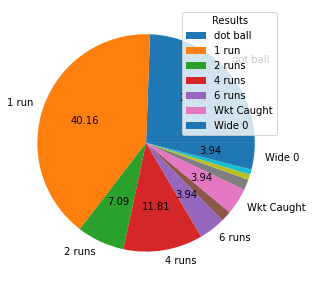

In [61]:
res_dist = {}
tot = inn1.inn_progress_df.shape[0]
for res in (inn1.inn_progress_df["result"]):
    if res in res_dist:
        res_dist[res] += 1
    else:
        res_dist[res] = 1
labels = [res_to_string[i] if res_dist[i]/tot*100 >= thresh else ''
          for i in sorted(res_dist)]
plt.pie([res_dist[i] for i in sorted(res_dist)], labels=labels, autopct=my_autopct)
plt.legend(title = "Results")
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

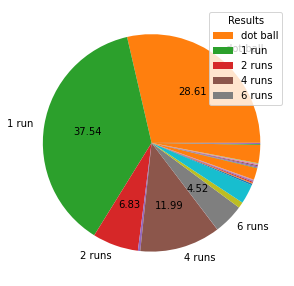

In [62]:
res_dist = {}
score = target - 1
start_score = score - 10
end_score = score + 10
df = batting_first[batting_first["Total"] >= start_score]
df = df[df["Total"] <= end_score]
tot = df.shape[0]
for res in (df["Result"]):
    if res in res_dist:
        res_dist[res] += 1
    else:
        res_dist[res] = 1
labels = [res_to_string[i] if res_dist[i]/tot*100 >= thresh else ''
          for i in sorted(res_dist)]
plt.pie([res_dist[i] for i in sorted(res_dist)], labels=labels, autopct=my_autopct)
plt.legend(title = "Results")
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()


In [8]:
chasing = pd.read_csv("Data/Chasing.csv")
ret_chasing = []
prev = tuple([None for i in range(5)])
for ind, row in tqdm(chasing.iterrows(), ncols=80, total=chasing.shape[0]):
    curr = (row["Venue"], row["Batting_Team"], row["Bowling_Team"], row["Toss"], row["Target"])
    if prev != curr:
        ret_chasing.append(curr)
    prev = curr
batting_first = pd.read_csv("Data/Batting_First.csv")
ret_batting_first = []
prev = tuple([None for i in range(4)])
for ind, row in tqdm(batting_first.iterrows(), ncols=80, total=batting_first.shape[0]):
    curr = (row["Venue"], row["Batting_Team"], row["Bowling_Team"], row["Toss"])
    if prev != curr:
        ret_batting_first.append(curr)
    prev = curr
print(len(ret_chasing), len(ret_batting_first))

100%|██████████████████████████████████| 76328/76328 [00:05<00:00, 15128.94it/s]

618 620


In [9]:
bf_count = 0
bs_count = 0
total = []
while bf_count < len(ret_batting_first) and bs_count < len(ret_chasing):
    i = ret_batting_first[bf_count]
    j = ret_chasing[bs_count]
    if i[0] == j[0] and i[1] == j[2] and i[2] == j[1] and i[3] == j[3]:
        bf_count += 1
        bs_count += 1
        total.append(j[4] - 1)
    else:
        bf_count += 1
        total.append(-1)
print(bf_count, bs_count)
target_col = []
prev = None
match_count = -1
for ind, row in tqdm(batting_first.iterrows(), ncols=80, total=batting_first.shape[0]):
    curr = (row["Venue"], row["Batting_Team"], row["Bowling_Team"], row["Toss"])
    if prev != curr:
        match_count += 1
    target_col.append(total[match_count])
    prev = curr
batting_first["Total"] = target_col

620 618


100%|██████████████████████████████████| 76328/76328 [00:04<00:00, 15989.14it/s]


## Innings 2

In [69]:
for _ in range(10):
    inn2_df = pd.DataFrame(columns=BS_Cols)
    # inn2 = Innings(CSK_Squad[0], RCB_Squad[1], RCB_Squad[0][0], RCB_Pitch, 2, inn2_df, 190)
    inn2 = Innings(RCB_Squad[0], CSK_Squad[1], RCB_Squad[0][0], RCB_Pitch, 2, inn2_df, 165)
    inn2.simulate_inning(model_inn_2)
    display_batting_table(inn2, 0)

Royal Challengers Bangalore  :  148 / 5  in  20 . 0
Extras: 14



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,12,1,0,12,Bowled,SN Thakur
1,KL Rahul,6,1,0,7,Bowled,SN Thakur
2,V Kohli,64,2,5,44,LBW,DJ Bravo
3,AB de Villiers,32,2,1,37,Bowled,DJ Bravo
4,SR Watson,20,2,0,20,Caught,DJ Bravo
5,KD Karthik,0,0,0,0,Not Out,-
6,CH Morris,0,0,0,0,Not Out,-
7,HV Patel,-,-,-,-,-,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  156 / 6  in  20 . 0
Extras: 6



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,2,0,0,7,Run Out,-
1,KL Rahul,50,7,0,45,Caught,DJ Bravo
2,V Kohli,43,6,2,28,Caught,RA Jadeja
3,AB de Villiers,11,0,1,10,Bowled,DJ Bravo
4,SR Watson,10,1,0,10,Bowled,SN Thakur
5,KD Karthik,28,2,1,13,Caught,DJ Bravo
6,CH Morris,6,0,0,8,Not Out,-
7,HV Patel,0,0,0,0,Not Out,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  115 / 7  in  20 . 0
Extras: 6



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,27,4,0,31,Caught,RA Jadeja
1,KL Rahul,10,1,0,21,Bowled,SN Thakur
2,V Kohli,0,0,0,1,LBW,Imran Tahir
3,AB de Villiers,5,1,0,6,Bowled,RA Jadeja
4,SR Watson,13,2,0,14,Caught,Imran Tahir
5,KD Karthik,7,0,1,9,Caught,RA Jadeja
6,CH Morris,5,0,0,6,Caught,Imran Tahir
7,HV Patel,26,3,1,15,Not Out,-
8,N Saini,16,0,1,17,Not Out,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  116 / 8  in  20 . 0
Extras: 7



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,5,1,0,3,Caught,DL Chahar
1,KL Rahul,28,4,1,17,Bowled,SN Thakur
2,V Kohli,7,1,0,9,LBW,DL Chahar
3,AB de Villiers,36,2,1,39,Run Out,-
4,SR Watson,2,0,0,4,Run Out,-
5,KD Karthik,12,1,0,14,Caught,Imran Tahir
6,CH Morris,3,0,0,8,Bowled,RA Jadeja
7,HV Patel,14,0,0,22,Caught,DJ Bravo
8,N Saini,1,0,0,2,Not Out,-
9,YS Chahal,1,0,0,2,Not Out,-



Royal Challengers Bangalore  :  152 / 3  in  20 . 0
Extras: 10



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,64,9,3,38,LBW,RA Jadeja
1,KL Rahul,5,0,0,9,LBW,SN Thakur
2,V Kohli,55,5,2,51,Not Out,-
3,AB de Villiers,11,0,0,15,Bowled,DJ Bravo
4,SR Watson,7,0,0,9,Not Out,-
5,KD Karthik,-,-,-,-,-,-
6,CH Morris,-,-,-,-,-,-
7,HV Patel,-,-,-,-,-,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  140 / 6  in  20 . 0
Extras: 9



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,27,2,0,35,Caught,RA Jadeja
1,KL Rahul,46,6,2,43,Bowled,DJ Bravo
2,V Kohli,0,0,0,1,Bowled,RA Jadeja
3,AB de Villiers,2,0,0,3,Caught,RA Jadeja
4,SR Watson,24,2,1,15,Not Out,-
5,KD Karthik,10,2,0,9,Bowled,SN Thakur
6,CH Morris,22,0,3,14,Bowled,DJ Bravo
7,HV Patel,0,0,0,0,Not Out,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  156 / 6  in  20 . 0
Extras: 16



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,28,4,0,25,Caught,Imran Tahir
1,KL Rahul,3,0,0,3,Run Out,-
2,V Kohli,33,3,1,37,Caught,DJ Bravo
3,AB de Villiers,15,2,0,14,Bowled,RA Jadeja
4,SR Watson,20,0,2,12,Caught,Imran Tahir
5,KD Karthik,29,3,2,19,Not Out,-
6,CH Morris,11,1,0,10,Run Out,-
7,HV Patel,1,0,0,1,Not Out,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  121 / 7  in  20 . 0
Extras: 8



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,2,0,0,8,LBW,DL Chahar
1,KL Rahul,29,3,2,20,Bowled,RA Jadeja
2,V Kohli,6,1,0,12,Caught,SN Thakur
3,AB de Villiers,6,0,0,11,Bowled,Imran Tahir
4,SR Watson,15,0,1,19,Caught,Imran Tahir
5,KD Karthik,36,3,0,36,Not Out,-
6,CH Morris,6,0,1,3,Bowled,DJ Bravo
7,HV Patel,5,0,0,6,Caught,DJ Bravo
8,N Saini,8,0,1,5,Not Out,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  113 / 4  in  20 . 0
Extras: 11



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,42,3,1,45,Bowled,DL Chahar
1,KL Rahul,0,0,0,1,Bowled,DL Chahar
2,V Kohli,14,2,0,30,Stumped,RA Jadeja
3,AB de Villiers,39,3,1,38,Not Out,-
4,SR Watson,7,1,0,7,Caught,DJ Bravo
5,KD Karthik,0,0,0,0,Not Out,-
6,CH Morris,-,-,-,-,-,-
7,HV Patel,-,-,-,-,-,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Royal Challengers Bangalore  :  136 / 6  in  20 . 0
Extras: 7



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,12,1,0,16,LBW,SN Thakur
1,KL Rahul,0,0,0,2,Run Out,-
2,V Kohli,67,7,3,57,Caught,DL Chahar
3,AB de Villiers,9,1,0,12,Caught,RA Jadeja
4,SR Watson,14,1,0,16,Caught,DJ Bravo
5,KD Karthik,23,3,1,14,Caught,DJ Bravo
6,CH Morris,3,0,0,2,Not Out,-
7,HV Patel,1,0,0,1,Not Out,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-


## Simulating Matches

In [8]:
print("Simulating First Match")
match_sim2 = Match(RCB_Squad, MI_Squad, RCB_Pitch, model_inn_1, model_inn_2, Display=1)

Simulating First Match
Mumbai Indians won the toss and chose to Bowl first
Royal Challengers Bangalore  :  192 / 6  in  20 . 0
Extras: 7



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,CH Gayle,5,1,0,7,LBW,SL Malinga
1,V Kohli,22,3,1,19,Bowled,Harbhajan Singh
2,AB de Villiers,25,4,0,23,Caught,MJ McClenaghan
3,KL Rahul,51,7,1,31,Caught,JJ Bumrah
4,SR Watson,37,5,1,20,Caught,SL Malinga
5,KD Karthik,41,3,3,15,Not Out,-
6,CH Morris,3,0,0,3,Caught,JJ Bumrah
7,HV Patel,1,0,0,3,Not Out,-
8,N Saini,-,-,-,-,-,-
9,YS Chahal,-,-,-,-,-,-



Mumbai Indians  :  138 / 5  in  20 . 0
Extras: 11



,Batsman,Runs,Fours,Sixes,Balls Faced,Dissmissal Type,Dismissed By
0,PA Patel,0,0,0,2,LBW,Mohammed Siraj
1,JC Buttler,53,8,1,48,Caught,Mohammed Siraj
2,RG Sharma,28,2,1,27,Run Out,-
3,HH Pandya,13,1,0,15,Run Out,-
4,KA Pollard,13,0,1,9,Caught,N Saini
5,KH Pandya,14,0,1,17,Not Out,-
6,Harbhajan Singh,6,1,0,3,Not Out,-
7,MJ McClenaghan,-,-,-,-,-,-
8,TG Southee,-,-,-,-,-,-
9,JJ Bumrah,-,-,-,-,-,-



Royal Challengers Bangalore won by 54 Runs
